# Markowitz Portfolio Optimization

This notebook implements a full Markowitz Efficient Frontier workflow using real market data.

### Steps:
1. Download adjusted close prices from Yahoo Finance  
2. Convert prices into daily log returns  
3. Compute portfolio statistics (return, variance, std, Sharpe)  
4. Solve:
   - Global Minimum Variance (GMV) portfolio  
   - Maximum Sharpe Ratio (MSR) portfolio  
5. Generate random portfolios for Monte Carlo comparison  
6. Plot the Efficient Frontier and highlight GMV + MSR points

### Assets Used
AAPL, MSFT, GOOGL, AMZN  
Period: From 2020 onwards


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import sys, os

# link utils folder
sys.path.append(os.path.abspath("../../utils"))

from quant_functions import *


## Load Market Data
We use Yahoo Finance (yfinance) to fetch daily closing prices.

In [4]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]
data = yf.download(tickers, start="2020-01-01", auto_adjust=True)
prices = data["Close"]
prices.tail()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2025-11-25,276.970001,229.669998,323.440002,476.98999
2025-11-26,277.549988,229.160004,319.950012,485.50000
2025-11-28,278.850006,233.220001,320.179993,492.01001
2025-12-01,283.100006,233.880005,314.890015,486.73999
2025-12-02,286.190002,234.419998,315.809998,490.00000


## Compute Daily Log Returns
We convert price data into daily log returns.


In [6]:
returns = compute_log_returns(prices)
returns.tail()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2025-11-25,0.003798,0.014870,0.015140,0.006288
2025-11-26,0.002092,-0.002223,-0.010849,0.017684
2025-11-28,0.004673,0.017562,0.000719,0.013320
2025-12-01,0.015126,0.002826,-0.016660,-0.010769
2025-12-02,0.010856,0.002306,0.002917,0.006675


## Compute GMV and Max Sharpe Portfolios
We use the optimization functions from utils/quant_functions.py.

In [7]:
# Compute Global Minimum Variance portfolio
gmv = global_min_variance(returns)

# Compute Maximum Sharpe Ratio portfolio
msr = max_sharpe_ratio(returns)

gmv, msr


(array([0.27272224, 0.09815259, 0.22131488, 0.40781029]),
 array([ 3.96436525e-01, -3.47848072e-22,  6.03563475e-01, -1.77862440e-22]))

## Efficient Frontier Visualization

The chart below shows:

- Thousands of random portfolios  
- The red Efficient Frontier curve (optimal risk-return combinations)  
- Green dot: Global Minimum Variance portfolio  
- Blue dot: Maximum Sharpe Ratio portfolio  

This validates the classic Markowitz theory on modern market data.


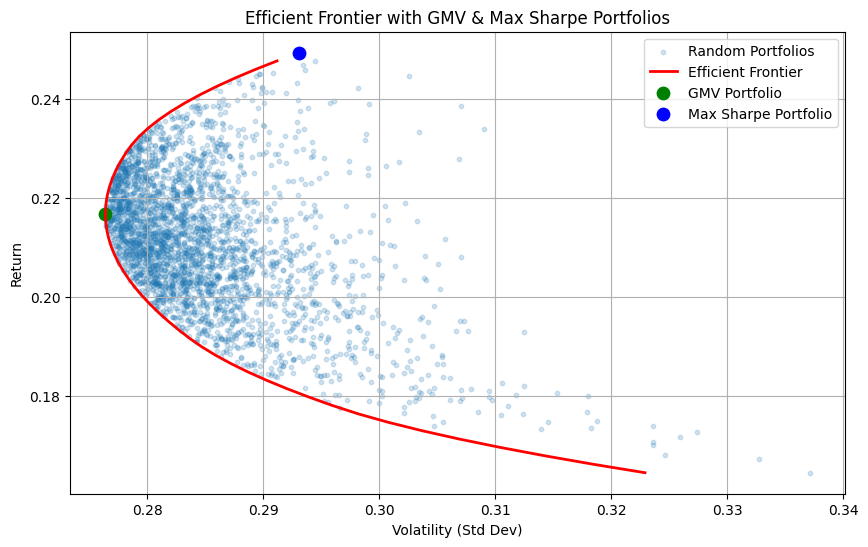

<Figure size 640x480 with 0 Axes>

In [11]:
plot_efficient_frontier(returns)
plt.savefig("sample_plots/efficient_frontier.png", dpi=300)


## Portfolio Performance Summary
We calculate and display the performance metrics for:
- Global Minimum Variance Portfolio (GMV)
- Maximum Sharpe Ratio Portfolio (MSR)


In [9]:
def portfolio_summary(name, weights, returns):
    ret = portfolio_return(weights, returns)
    vol = portfolio_std(weights, returns)
    sharpe = sharpe_ratio(weights, returns)
    
    print(f"=== {name} Portfolio ===")
    print("Weights:", np.round(weights, 4))
    print(f"Expected Annual Return: {ret:.4f}")
    print(f"Annual Volatility: {vol:.4f}")
    print(f"Sharpe Ratio: {sharpe:.4f}")
    print()
    

portfolio_summary("GMV", gmv, returns)
portfolio_summary("Max Sharpe", msr, returns)


=== GMV Portfolio ===
Weights: [0.2727 0.0982 0.2213 0.4078]
Expected Annual Return: 0.2168
Annual Volatility: 0.2764
Sharpe Ratio: 0.7120

=== Max Sharpe Portfolio ===
Weights: [ 0.3964 -0.      0.6036 -0.    ]
Expected Annual Return: 0.2494
Annual Volatility: 0.2931
Sharpe Ratio: 0.7826

